In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from matplotlib import image
from pathlib import Path
from tensorflow.keras import models, layers, Model, Input

from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, UpSampling2D, MaxPooling2D, concatenate

from PIL import Image
from numpy import asarray

In [2]:
isic_input_path = './../../../dataset/ISIC2018_Task1-2_Training_Input_x2/*.jpg'

isic_groundTruth_path = './../../../dataset/ISIC2018_Task1_Training_GroundTruth_x2/*.png'

In [3]:
isic_input = sorted(glob.glob(isic_input_path))
isic_groundTruth = sorted(glob.glob(isic_groundTruth_path))

DATASET_SIZE = len(isic_input)
BATCH_SIZE = 8
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 4
# print(len(isic_groundTruth))

In [4]:
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

# print(train_size, val_size, test_size)

In [5]:
full_ds = tf.data.Dataset.from_tensor_slices((isic_input, isic_groundTruth))
full_ds = full_ds.shuffle(DATASET_SIZE, reshuffle_each_iteration=False)

train_ds = full_ds.take(train_size)

# skip the dataset for train
test_ds = full_ds.skip(train_size)

val_ds = full_ds.skip(val_size)
test_ds = full_ds.take(test_size)

In [6]:
for image, label in train_ds.take(5):
    print('Image file:', image.numpy())
    print('Label:', label.numpy())

Image file: b'./../../../dataset/ISIC2018_Task1-2_Training_Input_x2\\ISIC_0014814.jpg'
Label: b'./../../../dataset/ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0014814_segmentation.png'
Image file: b'./../../../dataset/ISIC2018_Task1-2_Training_Input_x2\\ISIC_0013670.jpg'
Label: b'./../../../dataset/ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0013670_segmentation.png'
Image file: b'./../../../dataset/ISIC2018_Task1-2_Training_Input_x2\\ISIC_0000064.jpg'
Label: b'./../../../dataset/ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0000064_segmentation.png'
Image file: b'./../../../dataset/ISIC2018_Task1-2_Training_Input_x2\\ISIC_0012230.jpg'
Label: b'./../../../dataset/ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0012230_segmentation.png'
Image file: b'./../../../dataset/ISIC2018_Task1-2_Training_Input_x2\\ISIC_0013637.jpg'
Label: b'./../../../dataset/ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0013637_segmentation.png'


In [7]:
# def get_palette(a_input):
#     sample = cv2.cvtColor(cv2.imread((a_input)), cv2.COLOR_RGB2RGBA)
#     print(sample.shape)
#     sample = cv2.resize(sample, (256,256))
#     # print(test.shape)
#     # print(test)

#     my_list= []
#     for i in range(sample.shape[0]):
#         for j in range(sample.shape[1]):
#             my_list.append(sample[i,j,:].tolist())
    
#     palette = sort_and_deduplicate(my_list)
#     # print(palette)
#     return palette

# def uniq(lst):
#     last = object()
#     for item in lst:
#         if item == last:
#             continue
#         yield item
#         last = item

# def sort_and_deduplicate(l):
#     return list(uniq(sorted(l, reverse=True)))


# palette = get_palette(isic_groundTruth[0])
# palette2 = get_palette(isic_groundTruth[1])
# palette = [[255, 255, 255, 255], [0, 0, 0, 255]]
palette = [0, 255]
print(len(palette))

sample3 = tf.io.read_file(isic_input[0])
sample3 = tf.image.decode_png(sample3, channels=3) / 255
print(sample3)

2
tf.Tensor(
[[[0.827451   0.93333334 1.        ]
  [0.69803923 0.8039216  0.8862745 ]
  [0.7137255  0.8235294  0.91764706]
  ...
  [0.7411765  0.8784314  0.99607843]
  [0.7294118  0.8392157  0.93333334]
  [0.8901961  0.98039216 1.        ]]

 [[0.70980394 0.8117647  0.9019608 ]
  [0.5647059  0.6745098  0.7607843 ]
  [0.57254905 0.68235296 0.7764706 ]
  ...
  [0.627451   0.7647059  0.88235295]
  [0.60784316 0.7254902  0.81960785]
  [0.7764706  0.8666667  0.9372549 ]]

 [[0.73333335 0.84313726 0.9372549 ]
  [0.58431375 0.69411767 0.7882353 ]
  [0.5686275  0.6862745  0.7882353 ]
  ...
  [0.64705884 0.7882353  0.9137255 ]
  [0.62352943 0.7490196  0.84705883]
  [0.7882353  0.8862745  0.9647059 ]]

 ...

 [[0.7647059  0.87058824 0.9882353 ]
  [0.6509804  0.75686276 0.8745098 ]
  [0.6666667  0.78039217 0.90588236]
  ...
  [0.72156864 0.8509804  0.9098039 ]
  [0.7529412  0.8627451  0.91764706]
  [0.80784315 0.88235295 0.9490196 ]]

 [[0.74509805 0.84313726 0.9607843 ]
  [0.627451   0.73333335

tf.Tensor(
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]], shape=(256, 256, 1), dtype=uint8)
./../../../dataset/ISIC2018_Task1_Training_GroundTruth_x2\ISIC_0000000_segmentation.png


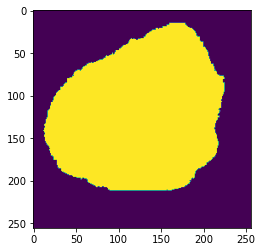

In [8]:
# sample2 = cv2.cvtColor(cv2.imread((isic_groundTruth[0])), cv2.COLOR_RGB2RGBA)
sample2 = tf.io.read_file(isic_groundTruth[0])
sample2 = tf.image.decode_png(sample2, channels=1)

sample2 =  tf.image.resize(sample2, [IMG_WIDTH, IMG_HEIGHT])
# gray_image = tf.squeeze(sample2) # shape (127,127,1) -> shape (127,127)
select_op = tf.where(sample2>127, 255*tf.ones_like(sample2), tf.zeros_like(sample2))
select_op = tf.reshape(select_op, (256, 256, 1)) / 255
# select_op = tf.cast(select_op, tf.float32) / 255
select_op = tf.cast(select_op, tf.uint8)
# print(np.unique(select_op))
print(select_op)
print(isic_groundTruth[0])
plt.imshow(select_op)

# sample2 =  tf.image.resize(sample2, [IMG_WIDTH, IMG_HEIGHT])
# print(sample2.shape)

# # for i in sample2:
# #     for j in i:
# #         print(j)
# unique = np.unique(sample2)
# print(unique)

In [9]:
def decode_img(image):
    image = tf.image.decode_jpeg(image, channels=3)
    # resize the image 256*256 
    image =  tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])
    # Standardise values to be in the [0, 1] range.
    image = tf.cast(image, tf.float32) / 255.0
    
    return image
    
def decode_label(label):
#     label = tf.image.decode_png(label)
#     label = label == [255, 0]
#     label = tf.reshape(label, (256, 256, 2))
#     print(label.shape)
    
#     return label

    label = tf.image.decode_png(label, channels=1)
    # Resize the image to the desired size.
    label =  tf.image.resize(label, [IMG_WIDTH, IMG_HEIGHT])
    
    label = tf.where(label > 127, 255*tf.ones_like(label), tf.zeros_like(label))
#     label = tf.reshape(label, (IMG_WIDTH, IMG_HEIGHT, 1)) / 255
#     label = tf.cast(label, tf.uint8)
#     print("before one hot:", label.shape)
#     return label
    
    one_hot_map = []

    for clr in palette:
        class_map = tf.equal(label, clr)
        class_map = tf.reduce_all(class_map,axis=-1)
        one_hot_map.append(class_map)
    
    one_hot_map = tf.stack(one_hot_map, axis=-1)
    one_hot_map = tf.cast(one_hot_map, tf.uint8)
    print("after one hot:", one_hot_map.shape)
    
    return one_hot_map

    
def process_data(image, label):
    image = tf.io.read_file(image)
    image = decode_img(image)
    
    label = tf.io.read_file(label)
    label = decode_label(label)
    
    return image, label   

In [10]:
# Use Dataset.map to apply this transformation.
processed_train_ds = train_ds.map(process_data)
processed_val_ds = val_ds.map(process_data)

processed_test_ds = test_ds.map(process_data)

after one hot: (256, 256, 2)
after one hot: (256, 256, 2)
after one hot: (256, 256, 2)


Image shape: b'./../../../dataset/ISIC2018_Task1-2_Training_Input_x2\\ISIC_0014814.jpg'
Label: b'./../../../dataset/ISIC2018_Task1_Training_GroundTruth_x2\\ISIC_0014814_segmentation.png'

Image shape: (256, 256, 3)
Label: (256, 256, 2)
tf.Tensor(
[[[1 0]
  [1 0]
  [1 0]
  ...
  [1 0]
  [1 0]
  [1 0]]

 [[1 0]
  [1 0]
  [1 0]
  ...
  [1 0]
  [1 0]
  [1 0]]

 [[1 0]
  [1 0]
  [1 0]
  ...
  [1 0]
  [1 0]
  [1 0]]

 ...

 [[1 0]
  [1 0]
  [1 0]
  ...
  [1 0]
  [1 0]
  [1 0]]

 [[1 0]
  [1 0]
  [1 0]
  ...
  [1 0]
  [1 0]
  [1 0]]

 [[1 0]
  [1 0]
  [1 0]
  ...
  [1 0]
  [1 0]
  [1 0]]], shape=(256, 256, 2), dtype=uint8)


(-0.5, 255.5, 255.5, -0.5)

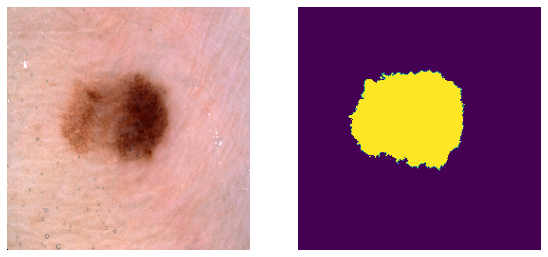

In [11]:
for image, label in train_ds.take(1):
    print('Image shape:', image.numpy())
    print('Label:', label.numpy())
print()

output_size = 0
for image, label in processed_train_ds.take(1):
    output_size = label.numpy().shape[2]
    print('Image shape:', image.numpy().shape)
    print('Label:', label.numpy().shape)
plt.figure(figsize=(20, 10))

# print(output_size)

print(label)
plt.subplot(1, 4, 1)
plt.imshow(image.numpy())
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(tf.argmax(label.numpy(), axis=2))
# plt.imshow(label.numpy())
plt.axis('off')

In [12]:
def dice_coef(img, img2):
    if img.shape != img2.shape:
        raise ValueError("Shape mismatch: img and img2 must have to be of the same shape.")
    else:
        img = img.numpy().astype(np.bool)
        img2 = img2.astype(np.bool)
        intersection = np.logical_and(img, img2)
        value = (2. * intersection.sum())  / (img.sum() + img2.sum())
    return value 

# preds_test[0].astype(np.bool)
def display(image, ground_truth, prediction, num):
    plt.figure(figsize=(20, 20))
    colors = ['black', 'green', 'red']
    for i in range(num):
        plt.subplot(4, 3, 3*i+1)
        plt.imshow(image[i])
        title = plt.title('The actual image')
        plt.setp(title, color=colors[0])
        plt.axis('off')
        
        plt.subplot(4, 3, 3*i+2)
        plt.imshow(tf.argmax(ground_truth[i], axis=-1))
#         plt.imshow(ground_truth[i])
        title = plt.title('Ground truth image segmentation')
        plt.setp(title, color=colors[1])
        plt.axis('off')
        
        plt.subplot(4, 3, 3*i+3)
        plt.imshow(tf.argmax(prediction[i], axis=-1))
#         plt.imshow(prediction[i])
        title = plt.title('Prediction image segmentation')
        plt.setp(title, color=colors[2])
        plt.axis('off')

        print("DICE SIMILARITY FOR INPUT {}: {}".format(i, dice_coef(ground_truth[i], prediction[i])))
    plt.show()
    
# display(label_test_batch, preds_test)

def show_predictions(processed_test_ds, num=3):
    image_test_batch, label_test_batch = next(iter(processed_test_ds.batch(3)))
    prediction = model.predict(image_test_batch)
    display(image_test_batch, label_test_batch, prediction, num)

from IPython.display import clear_output

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions(processed_test_ds)

In [15]:
from tensorflow.keras import backend as K

def dice_coef2(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
#     y_true_f = tf.cast(y_true_f, tf.uint8)
    y_pred_f = K.flatten(y_pred)
#     y_pred_f = tf.cast(y_pred_f, tf.uint8)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f*y_true_f) + K.sum(y_pred_f*y_pred_f) + smooth)

def dice_coef3(img, img2):
    if img.shape != img2.shape:
        print(img)
        print(img2.shape)
        raise ValueError("Shape mismatch: img and img2 must have to be of the same shape.")
    else:
        img = img.numpy().astype(np.bool)
        img2 = img2 > 0.5
        intersection = np.logical_and(img, img2)
        value = (2. * intersection.sum())  / (img.sum() + img2.sum())
    return value 

In [16]:
from model import *

model = unet(output_size)
if (output_size > 2):
    print("Loss Function: categorical_crossentropy")
    model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy', dice_coef2])
else:
    print("Loss Function: binary_crossentropy")
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy', dice_coef2])

print()
model.summary()

Loss Function: binary_crossentropy

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 256, 256, 16) 2320        conv2d_19[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 128, 128, 16) 0           conv2d_20[0][0]                  
________________________________________________________

DICE SIMILARITY FOR INPUT 0: 0.6666666666666666
DICE SIMILARITY FOR INPUT 1: 0.6666666666666666
DICE SIMILARITY FOR INPUT 2: 0.6666666666666666


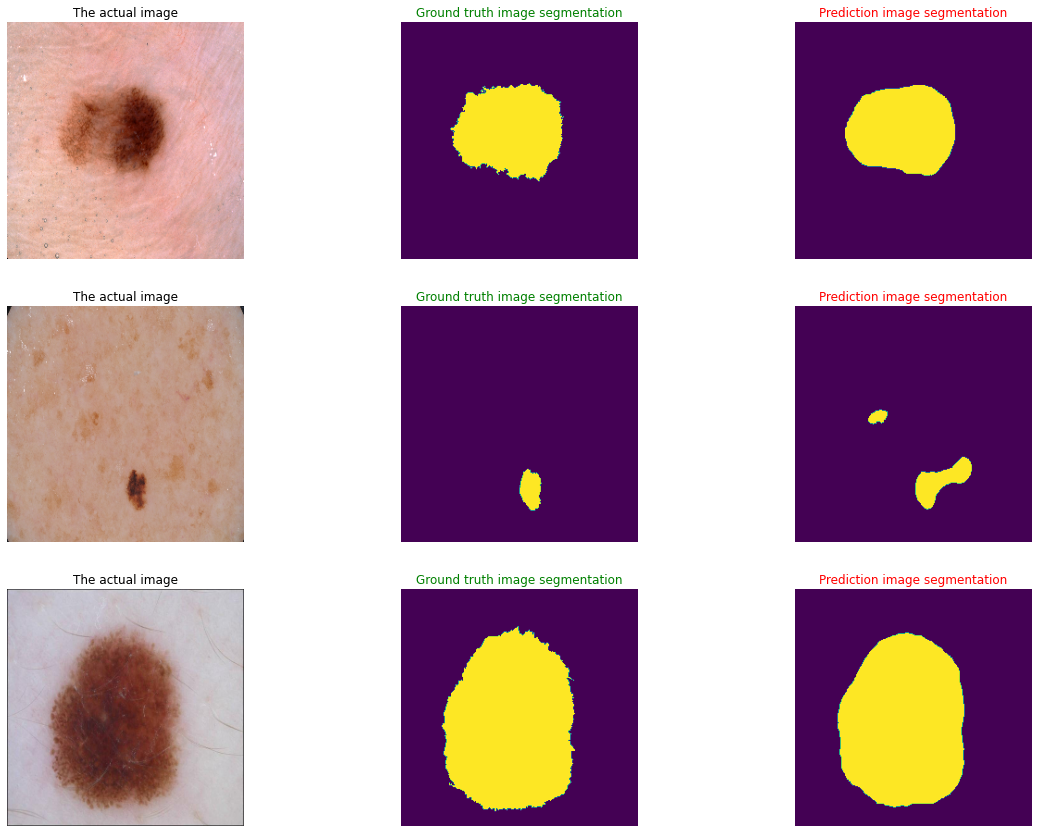

227/227 [==============================] - 136s 598ms/step - loss: 0.2101 - accuracy: 0.9217 - dice_coef2: 0.9360


KeyboardInterrupt: 

In [17]:
history = model.fit(processed_train_ds.batch(BATCH_SIZE), 
                    validation_data=processed_val_ds.batch(BATCH_SIZE), 
                    epochs=10, callbacks=[DisplayCallback()])

In [ ]:
test_loss, test_acc = model.evaluate(processed_test_ds.batch(BATCH_SIZE), verbose=2)

In [ ]:
image_test_batch, label_test_batch = next(iter(processed_test_ds.batch(3)))
prediction = model.predict(image_test_batch)
# prediction = prediction > 0.5
idx=2
plt.subplot(1,2,1)
plt.imshow(prediction[idx][:,:,1])
# plt.imshow(tf.argmax(prediction[idx], axis=-1))
print(prediction[idx].shape)
print("DICE_COEF:", dice_coef(label_test_batch[idx], prediction[idx]))
print("DICE_COEF2:", dice_coef2(label_test_batch[idx], prediction[idx]))
print("DICE_COEF3:", dice_coef3(label_test_batch[idx], prediction[idx]))
print()

plt.subplot(1,2,2)
prediction = tf.where(prediction[idx] > 0.5, tf.ones_like(prediction[idx]), tf.zeros_like(prediction[idx]))
# plt.imshow(prediction)
plt.imshow(tf.argmax(prediction, axis=-1))
print("DICE_COEF:", dice_coef(label_test_batch[idx], prediction.numpy()))
# print("DICE_COEF2:", dice_coef2(label_test_batch[idx], prediction.numpy()))
print("DICE_COEF3:", dice_coef3(label_test_batch[idx], prediction.numpy()))

In [ ]:
# show_predictions(processed_test_ds)

In [ ]:
################# HERE I USED SIGMOID INSTEAD OF SOFTMAX, INIT KERNEL IS 32